# Principal Component Analysis for Visualization

## 1. Scatter plot of high dimensional data

In [8]:
from sklearn.datasets import load_wine, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [2]:
# Load dataset
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (178, 13)
y shape: (178,)


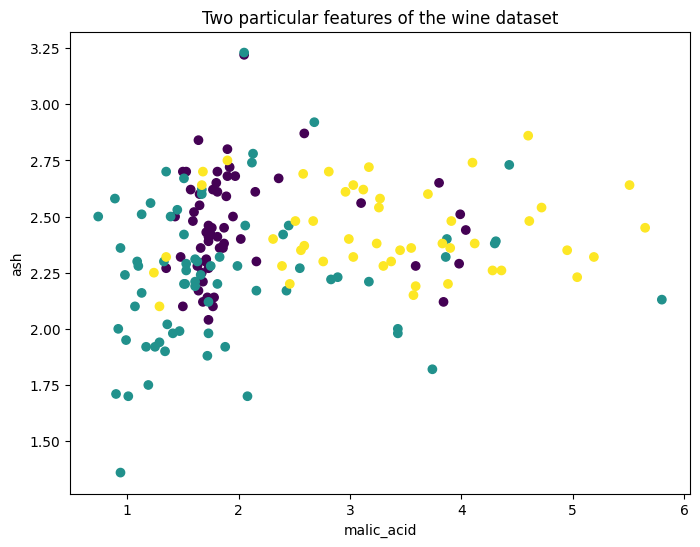

In [3]:
# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()

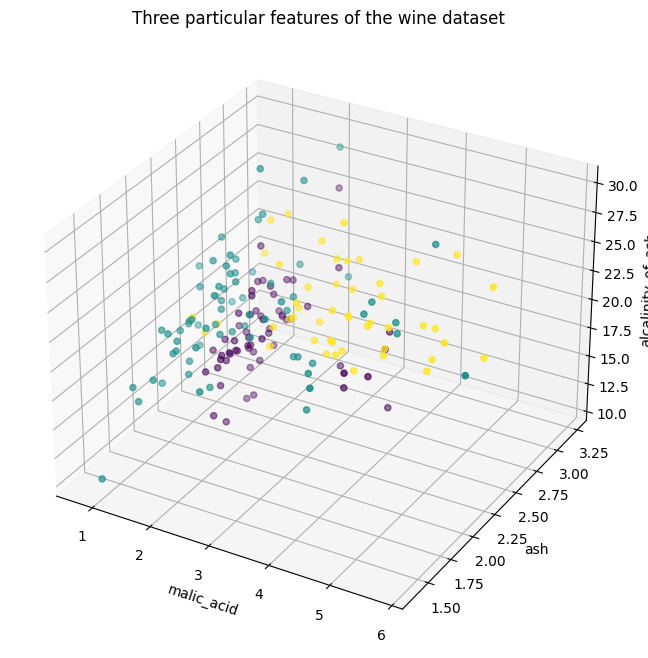

In [4]:

# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()


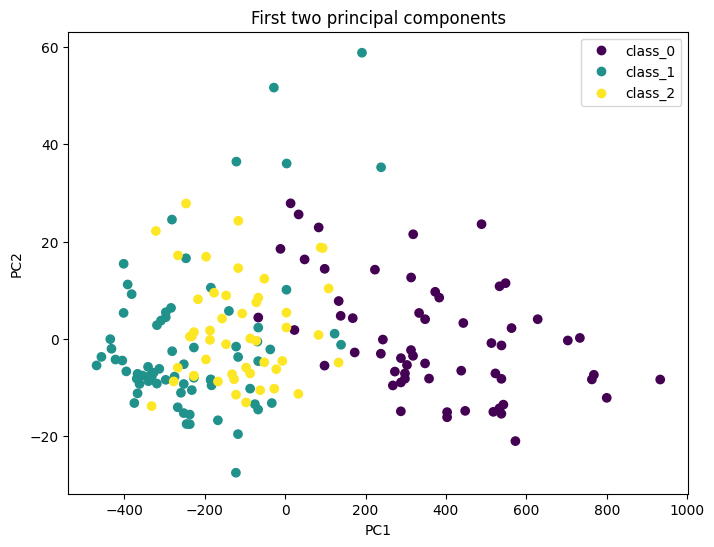

In [5]:

# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()


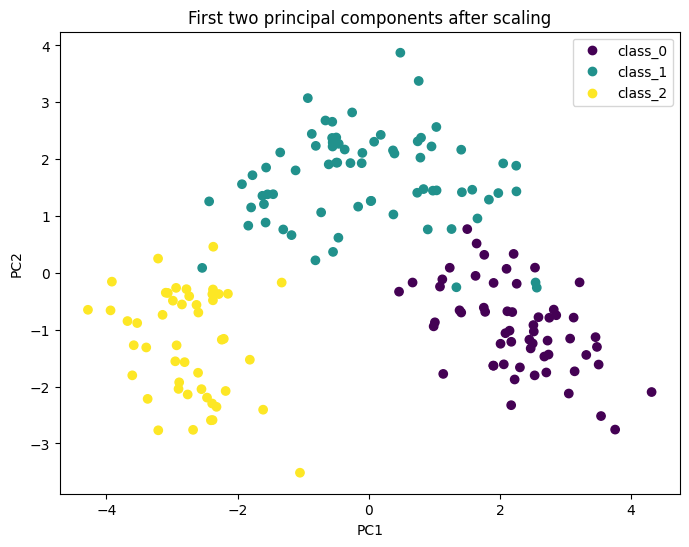

In [6]:

# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

If we apply the same method on a different dataset, such as MINST handwritten digits, the scatterplot is not showing distinctive boundary and therefore it needs a more complicated model such as neural network to classify:

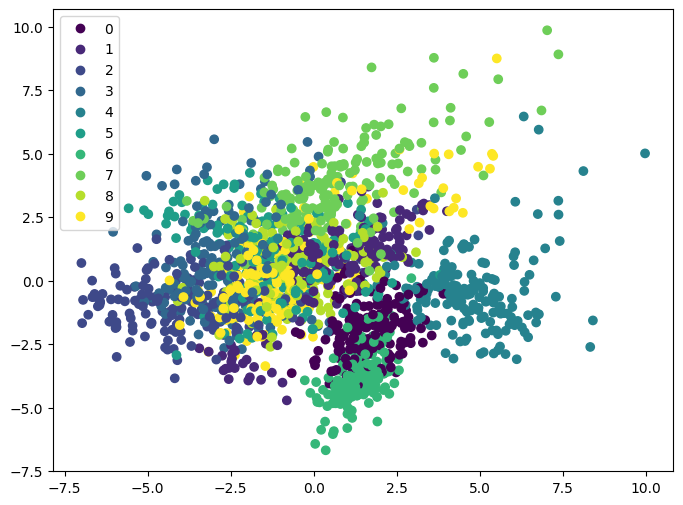

In [9]:
digitsdata = load_digits()
X, y = digitsdata['data'], digitsdata['target']
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(digitsdata['target_names']))
plt.show()

## Visualizing the explained variance

PCA in essence is to rearrange the features by their linear combinations. Hence it is called a feature extraction technique. One characteristic of PCA is that the first principal component holds the most information about the dataset. The second principal component is more informative than the third, and so on.

To illustrate this idea, we can remove the principal components from the original dataset in steps and see how the dataset looks like. Let’s consider a dataset with fewer features, and show two features in a plot:

In [10]:
from sklearn.datasets import load_iris

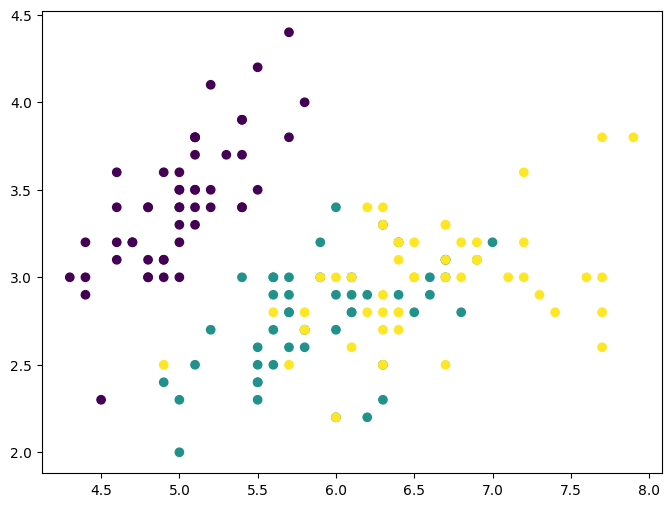

In [11]:
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [12]:
pca = PCA().fit(X)
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


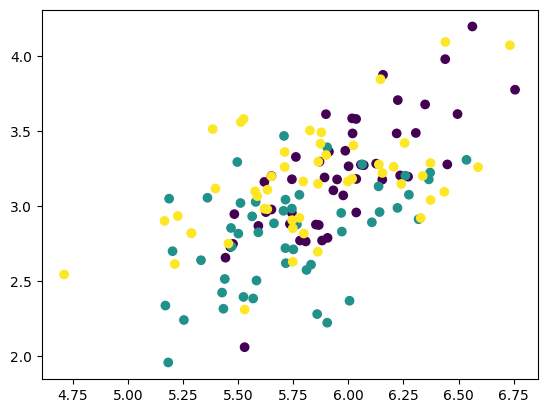

In [13]:
...
# Remove PC1
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)
Xremove = X - pc1
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

The numpy array Xmean is to shift the features of X to centered at zero. This is required for PCA. Then the array value is computed by matrix-vector multiplication. 

The array value is the magnitude of each data point mapped on the principal axis. So if we multiply this value to the principal axis vector we get back an array pc1. Removing this from the original dataset X, we get a new array Xremove. In the plot we observed that the points on the scatter plot crumbled together and the cluster of each class is less distinctive than before. 

This means we removed a lot of information by removing the first principal component. If we repeat the same process again, the points are further crumbled:



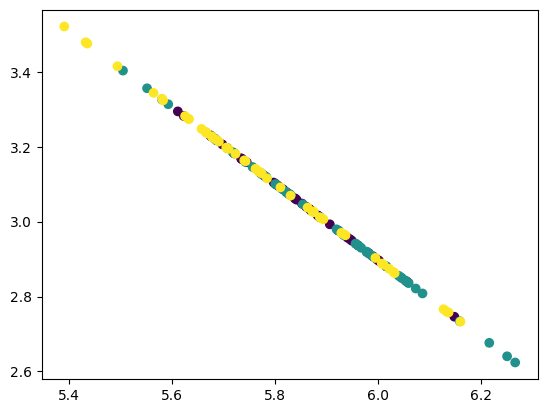

In [14]:
...
# Remove PC2
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

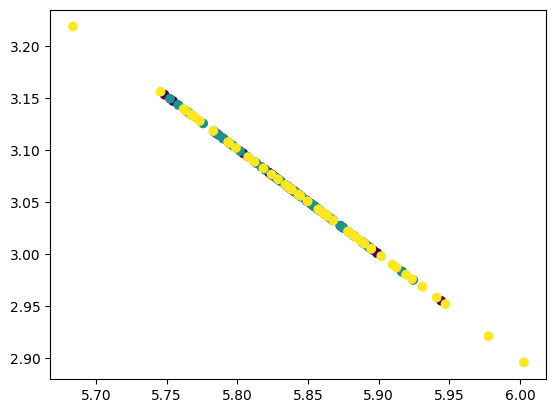

In [15]:
...
# Remove PC3
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

The points all fall on a straight line because we removed three principal components from the data where there are only four features. Hence our data matrix becomes rank 1. You can try repeat once more this process and the result would be all points collapse into a single point. The amount of information removed in each step as we removed the principal components can be found by the corresponding explained variance ratio from the PCA:

In [16]:
...
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.svm import SVC

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))


Using all features, accuracy:  0.98
Using all features, F1:  0.9777530589543938


In [20]:

mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

Using PC1, accuracy:  0.92
Using PC1, F1:  0.9107142857142857


## Example of PCA in features

In [21]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [22]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.034)


In [23]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [24]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


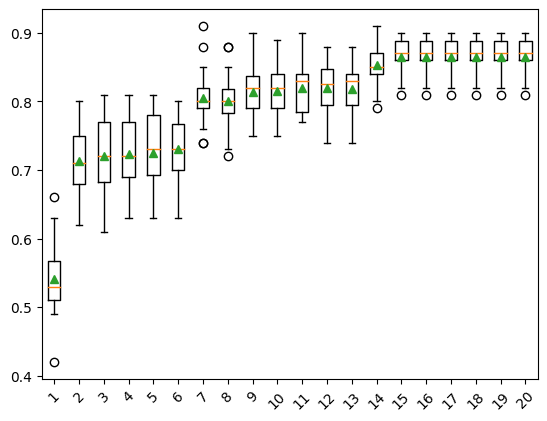

In [25]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [26]:
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1
